In [69]:
import os
import pandas as pd
import numpy as np
from scipy import stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
searched_format = 'csv'
for file in os.listdir(os.getcwd()):
    if searched_format in file:
        PATH = os.path.abspath(file)

In [5]:
conversion_df = pd.read_csv(PATH)
conversion_df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


## Убедимся, что всё считалось правильно: посмотрим на столбцы, типы данных, размерность, наличие пропущенных значений.

In [6]:
conversion_df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [7]:
conversion_df.shape

(1143, 11)

In [8]:
conversion_df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [9]:
conversion_df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [15]:
conversion_df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

## Построим график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.

In [21]:
log_impressions_df = conversion_df.groupby('fb_campaign_id') \
                                    .agg({'Impressions': 'sum'}) \
                                    .Impressions.apply(np.log) \
                                    .reset_index()

In [22]:
log_impressions_df

,fb_campaign_id,Impressions
0,103916,8.902456
1,103917,9.790375
2,103920,6.541030
3,103928,9.035034
4,103929,7.557473
...,...,...
686,179977,13.937527
687,179978,13.365386
688,179979,11.928546
689,179981,13.580108


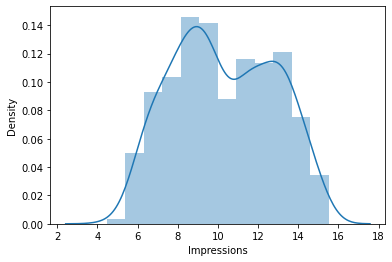

In [24]:
sns.distplot(log_impressions_df.Impressions)

## Посчитаем метрику CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

In [25]:
conversion_df = conversion_df.assign(CTR = conversion_df.Clicks / conversion_df.Impressions)

In [27]:
conversion_df.sort_values('CTR', ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


In [36]:
max_CTR_id = conversion_df.loc[conversion_df.CTR.idxmax(),'ad_id']
max_CTR_id

738637

## Визуализируем CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

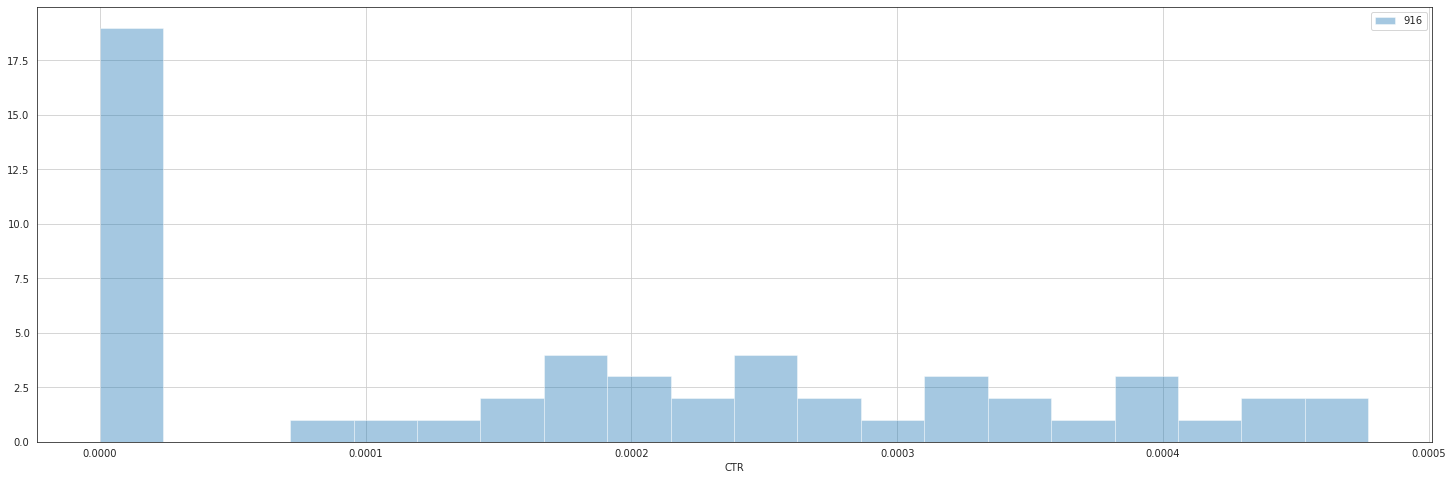

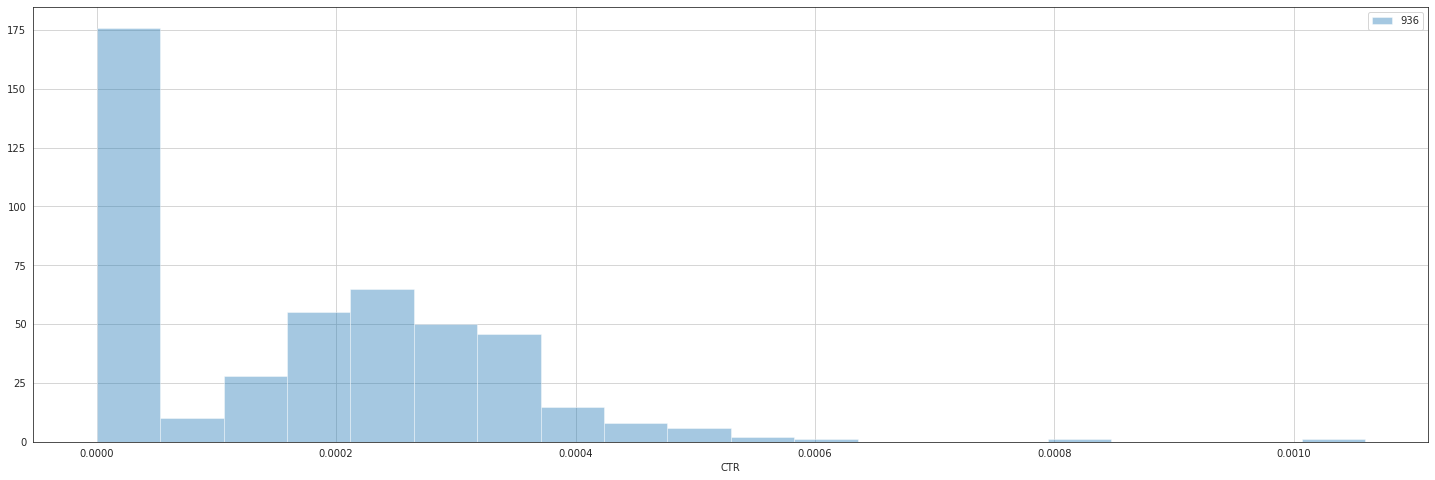

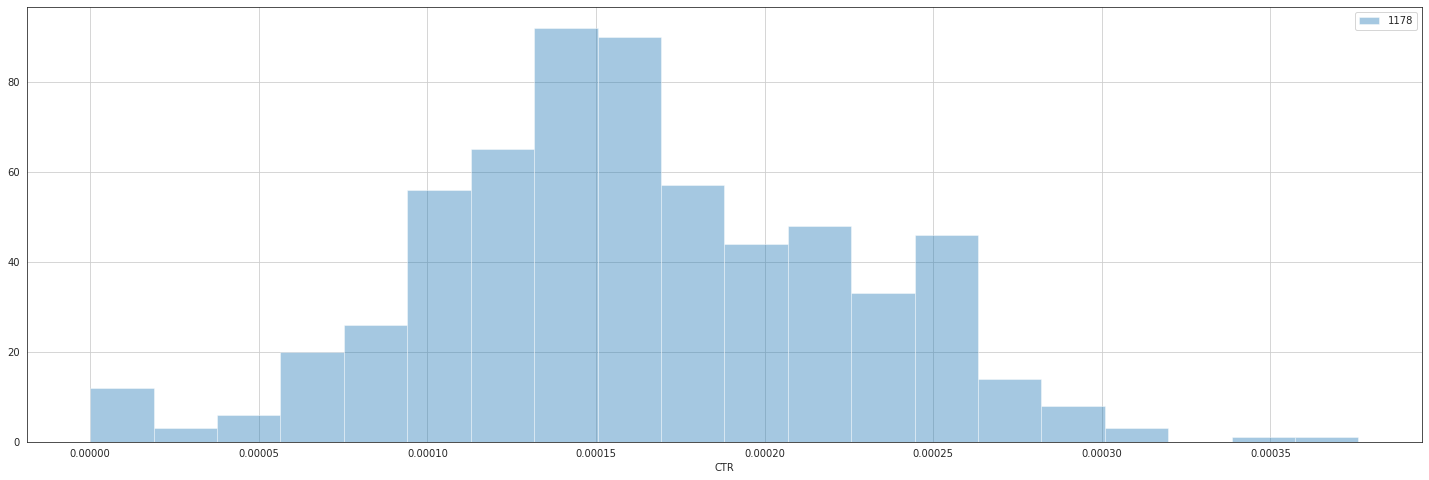

In [51]:
for campaign in conversion_df.xyz_campaign_id.unique():
    plt.figure(figsize = (25,8))
    sns.distplot(conversion_df.query("xyz_campaign_id == @campaign").CTR, bins=20, kde=False, label=campaign)
    plt.legend()
    plt.grid()
sns.set_style("white")
plt.show()

## Выведем описательные статистики для CPC, посмотрим на форму распределения. Определим межквартильный размах, округленный до двух знаков после точки.

In [53]:
conversion_df = conversion_df.assign(CPC = conversion_df.Spent / conversion_df.Clicks)

In [58]:
conversion_df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

No handles with labels found to put in legend.
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


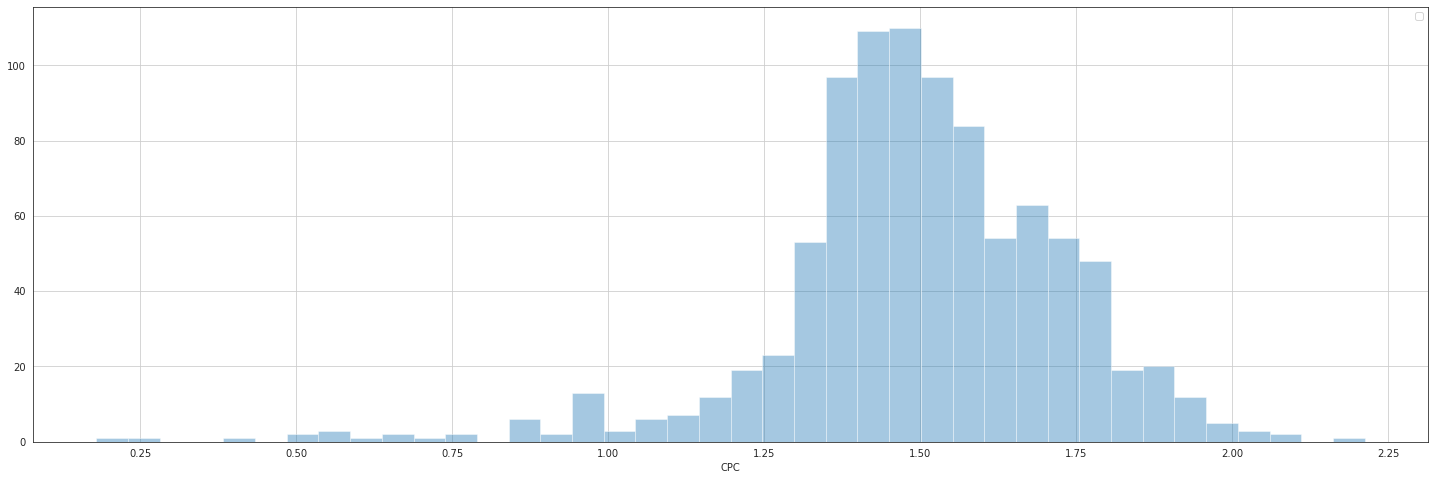

In [66]:
plt.figure(figsize = (25,8))
plt.legend()
plt.grid()
sns.set_style("white")
sns.distplot(conversion_df.CPC.dropna(), kde=False)
plt.show()

No handles with labels found to put in legend.
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


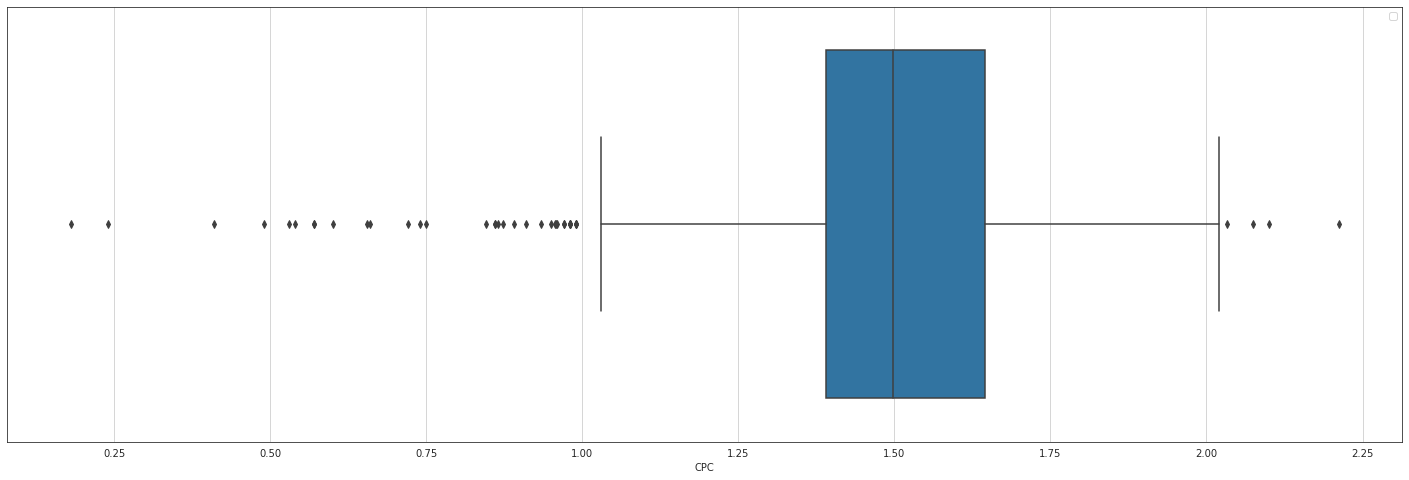

In [67]:
plt.figure(figsize = (25,8))
plt.legend()
plt.grid()
sns.boxplot(conversion_df.CPC.dropna())


##### Межквартильный размах

In [71]:
round(ss.iqr(conversion_df.CPC.dropna()), 2)

0.25

## Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


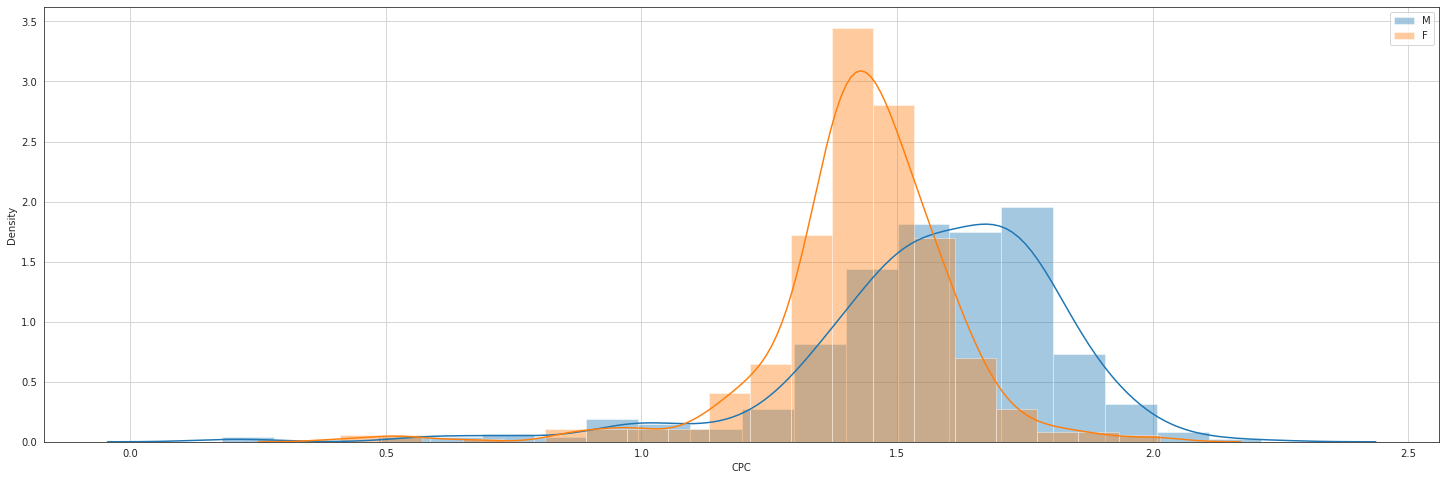

In [86]:
plt.figure(figsize = (25,8))
plt.grid()
for sex in conversion_df.gender.unique():
    sns.distplot(conversion_df.query("gender == @sex").CPC.dropna(), bins=20, label=sex)
plt.legend()
sns.set_style("white")
plt.show()


## Посчитаем конверсию из клика в покупку. Определим конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

In [87]:
conversion_df = conversion_df.assign(CR = conversion_df.Approved_Conversion / conversion_df.Clicks)

In [92]:
conversion_df.query('ad_id == 1121814').CR.round(2) * 100

860    3.0
Name: CR, dtype: float64